# Linear Regression

## Importing libraries & Creating Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_excel("autoMPG_data.xlsx", engine="openpyxl")

In [3]:
df.head()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3,Name
0,5.555556,5.555556,18.0,8,3.07,1.30,3.504,12.0,70,1,1,1,0,0,chevrolet chevelle malibu
1,6.666667,6.666667,15.0,8,3.50,1.65,3.693,11.5,70,1,1,1,0,0,buick skylark 320
2,5.555556,5.555556,18.0,8,3.18,1.50,3.436,11.0,70,1,1,1,0,0,plymouth satellite
3,6.250000,6.250000,16.0,8,3.04,1.50,3.433,12.0,70,1,1,1,0,0,amc rebel sst
4,5.882353,5.882353,17.0,8,3.02,1.40,3.449,10.5,70,1,1,1,0,0,ford torino


## Data exporation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GallonsPer100Miles        392 non-null    float64
 1   GallonsPer100MilesTo1981  362 non-null    float64
 2   MPG                       392 non-null    float64
 3   Cylinders                 392 non-null    int64  
 4   Displacement100ci         392 non-null    float64
 5   Horsepower100             392 non-null    float64
 6   Weight1000lb              392 non-null    float64
 7   Seconds0to60              392 non-null    float64
 8   Year                      392 non-null    int64  
 9   Year70To81                392 non-null    int64  
 10  Origin                    392 non-null    int64  
 11  Origin.Eq.1               392 non-null    int64  
 12  Origin.Eq.2               392 non-null    int64  
 13  Origin.Eq.3               392 non-null    int64  
 14  Name      

In [22]:
df.describe()

,GallonsPer100Miles,GallonsPer100MilesTo1981,MPG,Cylinders,Displacement100ci,Horsepower100,Weight1000lb,Seconds0to60,Year,Year70To81,Origin,Origin.Eq.1,Origin.Eq.2,Origin.Eq.3
count,392.000000,362.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,4.782243,4.912568,23.445918,5.471939,1.94412,1.044694,2.977584,15.541327,75.979592,0.923469,1.576531,0.625000,0.173469,0.201531
std,1.663944,1.659047,7.805007,1.705783,1.04644,0.384912,0.849403,2.758864,3.683737,0.266185,0.805518,0.484742,0.379136,0.401656
min,2.145923,2.145923,9.000000,3.000000,0.68000,0.460000,1.613000,8.000000,70.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.448276,3.571429,17.000000,4.000000,1.05000,0.750000,2.225250,13.775000,73.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,4.396135,4.651163,22.750000,4.000000,1.51000,0.935000,2.803500,15.500000,76.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,5.882353,6.024744,29.000000,8.000000,2.75750,1.260000,3.614750,17.025000,79.000000,1.000000,2.000000,1.000000,0.000000,0.000000
max,11.111111,11.111111,46.600000,8.000000,4.55000,2.300000,5.140000,24.800000,82.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [18]:
df.shape

(392, 15)

No missing values.

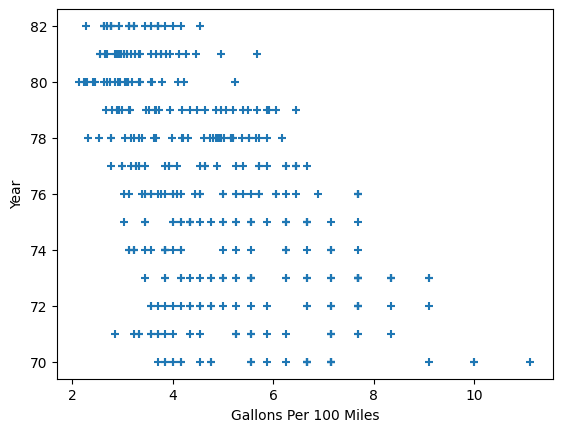

In [10]:
plt.xlabel('Gallons Per 100 Miles')
plt.ylabel('Year')
plt.scatter(df.GallonsPer100Miles, df.Year, marker = '+')

As we can see, the newer the car the less Gallons per 100 miles used

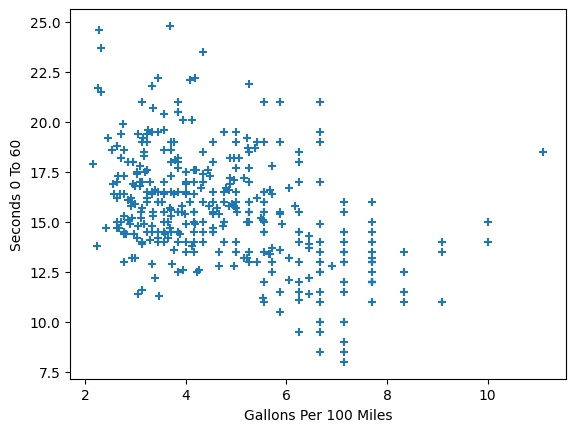

In [8]:
plt.xlabel('Gallons Per 100 Miles')
plt.ylabel('Seconds 0 To 60')
plt.scatter(df.GallonsPer100Miles, df.Seconds0to60, marker = '+')

Gallons used and seconds from 0 to 60 do not really have any corrolation based on this data

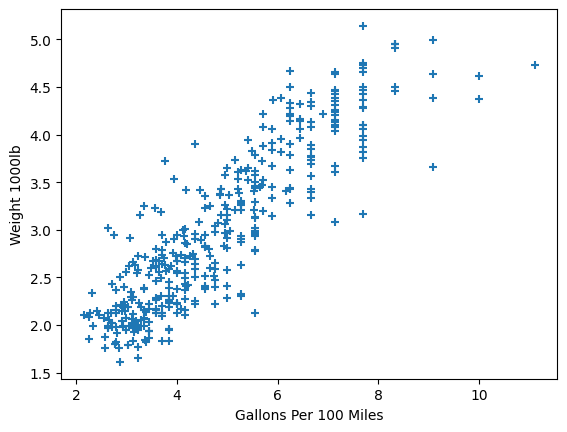

In [12]:
plt.xlabel('Gallons Per 100 Miles')
plt.ylabel('Weight 1000lb')
plt.scatter(df.GallonsPer100Miles, df.Weight1000lb, marker = '+')

Weight of the car affects how many gallons of fuel the car uses.

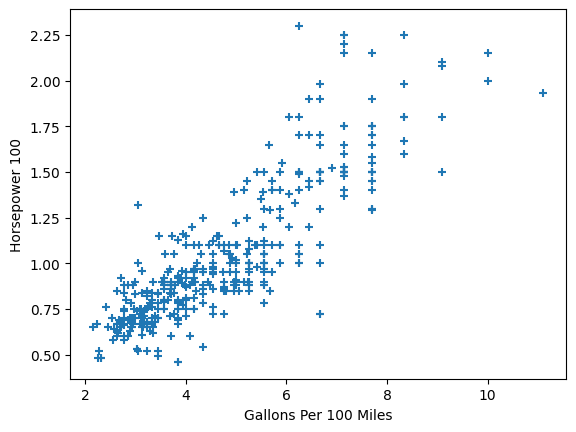

In [13]:
plt.xlabel('Gallons Per 100 Miles')
plt.ylabel('Horsepower 100')
plt.scatter(df.GallonsPer100Miles, df.Horsepower100, marker = '+')

Horsepower and Gallons also have a correlation

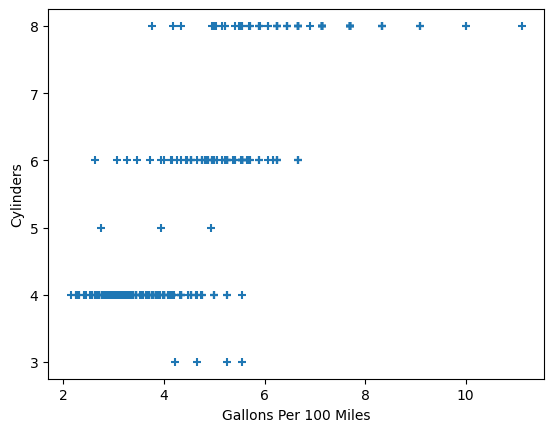

In [14]:
plt.xlabel('Gallons Per 100 Miles')
plt.ylabel('Cylinders')
plt.scatter(df.GallonsPer100Miles, df.Cylinders, marker = '+')

As we can see, the more cylinders, the more gallons used per 100 miles

## Creating the model

In [82]:
Gallons = df['GallonsPer100Miles'].values
Horsepower = df['Horsepower100'].values
Weight = df['Weight1000lb'].values

Declaring the X and y like this, so it is easier to change later

In [56]:
X = np.array(Gallons).reshape(-1, 1)
y = np.array(Horsepower)

In [57]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
X_train

array([[ 4.54545455],
       [ 4.76190476],
       [ 2.7027027 ],
       [ 4.76190476],
       [ 6.66666667],
       [ 3.22580645],
       [ 4.34782609],
       [ 4.08163265],
       [ 3.44827586],
       [ 3.27868852],
       [ 6.66666667],
       [ 2.88184438],
       [ 3.7037037 ],
       [ 3.57142857],
       [ 5.26315789],
       [ 2.40963855],
       [ 5.71428571],
       [ 3.44827586],
       [ 3.84615385],
       [ 3.14465409],
       [ 5.55555556],
       [ 6.06060606],
       [ 7.69230769],
       [ 5.26315789],
       [ 3.33333333],
       [ 5.        ],
       [ 5.26315789],
       [ 3.7037037 ],
       [ 4.34782609],
       [ 7.14285714],
       [ 4.85436893],
       [ 3.58422939],
       [ 6.66666667],
       [ 3.125     ],
       [ 8.33333333],
       [ 4.34782609],
       [ 2.98507463],
       [ 3.92156863],
       [ 2.45098039],
       [ 6.06060606],
       [ 3.09597523],
       [ 2.25733634],
       [ 8.33333333],
       [ 3.04878049],
       [ 4.16666667],
       [ 5

In [59]:
y_train

array([0.94, 0.85, 0.92, 0.9 , 1.  , 0.68, 0.95, 0.88, 0.52, 0.78, 0.72,
       0.63, 0.88, 0.86, 1.12, 0.76, 1.45, 0.83, 0.93, 0.65, 1.  , 1.38,
       1.45, 1.  , 0.67, 0.9 , 0.85, 0.9 , 0.78, 2.2 , 1.1 , 1.05, 1.7 ,
       0.7 , 1.67, 0.97, 0.7 , 0.89, 0.65, 1.8 , 0.67, 0.48, 1.98, 0.52,
       0.97, 1.39, 1.5 , 1.9 , 1.8 , 1.05, 0.61, 0.71, 1.  , 1.1 , 1.6 ,
       1.13, 1.65, 0.75, 1.22, 1.55, 0.84, 0.84, 0.9 , 0.9 , 0.9 , 1.  ,
       0.75, 1.7 , 1.45, 0.85, 0.78, 1.  , 0.6 , 0.88, 1.25, 0.79, 0.53,
       0.68, 1.3 , 0.92, 0.65, 1.75, 1.6 , 0.58, 1.4 , 1.3 , 1.07, 0.53,
       0.92, 1.03, 0.75, 0.88, 0.97, 0.7 , 0.9 , 0.8 , 1.29, 0.7 , 1.5 ,
       1.7 , 1.1 , 1.  , 0.96, 1.5 , 0.72, 2.3 , 1.8 , 0.78, 2.  , 1.5 ,
       0.65, 1.05, 0.68, 1.65, 0.67, 1.1 , 0.67, 1.5 , 0.9 , 0.88, 0.88,
       0.48, 0.88, 0.7 , 1.39, 1.05, 0.83, 1.29, 1.1 , 0.67, 1.5 , 1.5 ,
       1.5 , 0.48, 1.5 , 0.97, 1.05, 1.5 , 0.88, 1.93, 0.71, 0.52, 0.88,
       0.97, 1.45, 1.75, 0.76, 1.1 , 0.65, 0.9 , 1.

In [72]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

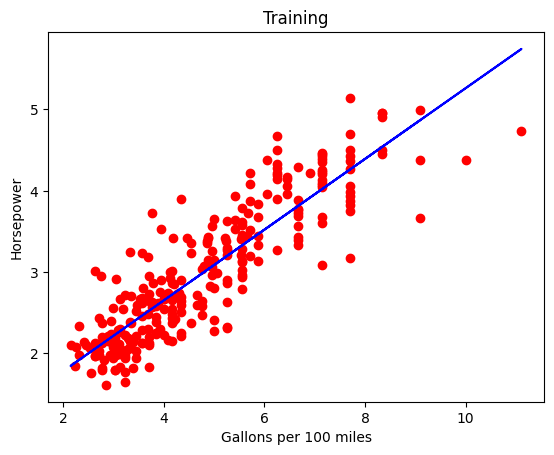

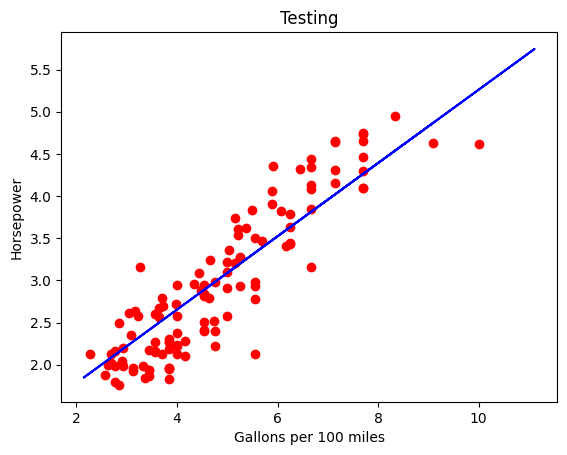

In [90]:
#Visualizing the training Test Results 
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title ("Training")
plt.xlabel("Gallons per 100 miles")
plt.ylabel("Horsepower")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Testing")
plt.xlabel("Gallons per 100 miles")
plt.ylabel("Horsepower")
plt.show()

In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.7209906680925262


Based on our exploration before, the other feature that could work would be the Weight by 1000lb column, so lets try that as well to see if we can improve our accuracy

In [83]:
y = np.array(Weight)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
y_train

array([2.379, 2.587, 2.434, 2.648, 3.336, 1.97 , 2.694, 2.74 , 2.035,
       2.19 , 3.432, 2.215, 2.64 , 2.464, 2.868, 2.144, 3.88 , 2.219,
       2.391, 2.02 , 3.288, 3.955, 4.055, 3.63 , 3.25 , 2.408, 2.31 ,
       2.735, 2.592, 4.354, 3.36 , 2.8  , 3.563, 1.99 , 4.906, 2.506,
       1.945, 2.755, 2.11 , 4.38 , 2.065, 2.085, 4.952, 1.985, 2.489,
       3.205, 4.237, 4.422, 3.664, 3.121, 2.003, 3.19 , 3.278, 3.52 ,
       4.456, 2.234, 4.209, 2.125, 2.807, 4.502, 2.49 , 2.525, 3.381,
       2.678, 2.95 , 2.901, 2.246, 4.165, 3.988, 3.015, 3.574, 2.42 ,
       2.164, 2.395, 3.9  , 2.255, 1.795, 2.135, 4.295, 2.865, 1.836,
       4.464, 3.609, 1.755, 4.215, 3.84 , 2.472, 1.795, 2.62 , 2.83 ,
       2.158, 3.06 , 2.405, 2.245, 3.265, 3.23 , 3.169, 2.07 , 4.457,
       4.668, 3.645, 3.651, 2.665, 3.436, 2.565, 4.278, 4.22 , 1.94 ,
       4.376, 3.399, 2.11 , 3.425, 2.025, 3.445, 1.85 , 2.725, 1.95 ,
       4.077, 2.711, 2.13 , 2.1  , 2.335, 2.279, 2.125, 3.57 , 3.613,
       2.202, 3.725,

In [85]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

pred = regressor.predict(X_test)

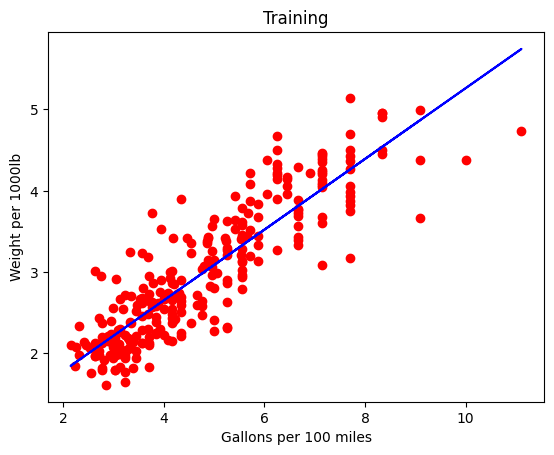

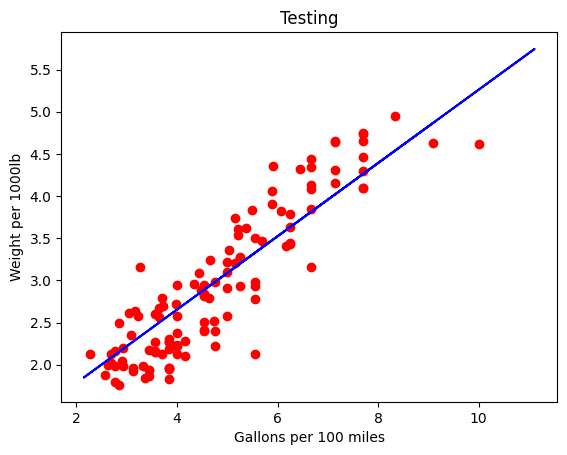

In [91]:
plt.scatter(X_train, y_train, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title ("Training")
plt.xlabel("Gallons per 100 miles")
plt.ylabel("Weight per 1000lb")
plt.show()

#Visualizing the Test Results 
plt.scatter(X_test, y_test, color= 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Testing")
plt.xlabel("Gallons per 100 miles")
plt.ylabel("Weight per 1000lb")
plt.show()

In [87]:
print(r2_score(y_test, pred))

0.7984215962383413


We got a 5% improvement in our accuracy!